# Create Region Dataset with Selective Search

## Preparation

In [1]:
from data_managers import load_train_dataset
from myutils import extract_regions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch as sls
import numpy as np
%matplotlib inline
import settings
import os
import shutil

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)
/home/liuweijie/workspace/FisheriesMonitor/.env/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
# set some settings
scale = 500
min_pixels = 1000
img_size = settings.image_size
region_dir = "../dataset/regions/"

In [3]:
# mkdir
if os.path.exists(region_dir):
    shutil.rmtree(region_dir)
os.mkdir(region_dir)

## Example

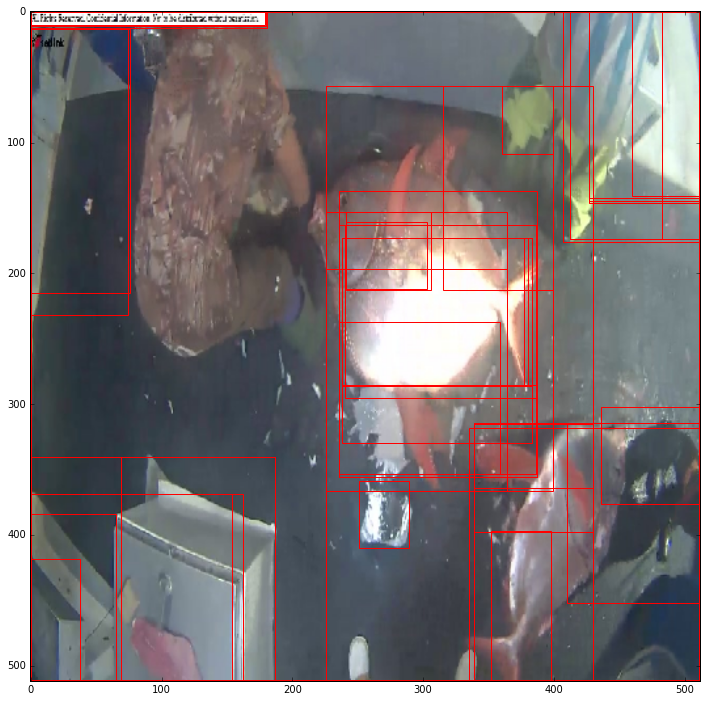

In [4]:
# an example
X, Y = load_train_dataset(class_names=['LAG'], verbose=0, img_size=(512, 512))
img = X[0]
candidates = extract_regions(img, scale=scale, min_pixels=min_pixels)

# draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.imshow(np.rollaxis(img, 0, 3).astype('uint8'))
for x, y, w, h in candidates:
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.show()

## Generate Region of NoF

In [5]:
for class_name in settings.class_names_to_int.keys():
    
    print class_name

    # load dataset
    X_nof, Y_nof = load_train_dataset(class_names=[class_name], verbose=0, img_size=img_size)

    # mkdir
    dir_name = os.path.join(region_dir, class_name)
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.mkdir(dir_name)

    # save regions
    num_imgs = len(X_nof)
    for i in range(num_imgs):

        print i, '/', num_imgs

        image = X_nof[i]
        candidates = extract_regions(image, scale=scale, min_pixels=min_pixels)

        for r in range(len(candidates)):
            x, y, w, h = candidates[r]
            region = np.rollaxis(image[:, y: y+h, x: x+w], 0, 3)
            region_name = dir_name + '/' + str(i) +  '_' + str(r) + '.png'
            plt.imsave(region_name, region.astype('uint8'))

YFT
0 / 734
1 / 734
2 / 734
3 / 734
4 / 734
5 / 734
6 / 734
7 / 734
8 / 734
9 / 734
10 / 734
11 / 734
12 / 734
13 / 734
14 / 734
15 / 734
16 / 734
17 / 734
18 / 734
19 / 734
20 / 734
21 / 734
22 / 734
23 / 734
24 / 734
25 / 734
26 / 734
27 / 734
28 / 734
29 / 734
30 / 734
31 / 734
32 / 734
33 / 734
34 / 734
35 / 734
36 / 734
37 / 734
38 / 734
39 / 734
40 / 734
41 / 734
42 / 734
43 / 734
44 / 734
45 / 734
46 / 734
47 / 734
48 / 734
49 / 734
50 / 734
51 / 734
52 / 734
53 / 734
54 / 734
55 / 734
56 / 734
57 / 734
58 / 734
59 / 734
60 / 734
61 / 734
62 / 734
63 / 734
64 / 734
65 / 734
66 / 734
67 / 734
68 / 734
69 / 734
70 / 734
71 / 734
72 / 734
73 / 734
74 / 734
75 / 734
76 / 734
77 / 734
78 / 734
79 / 734
80 / 734
81 / 734
82 / 734
83 / 734
84 / 734
85 / 734
86 / 734
87 / 734
88 / 734
89 / 734
90 / 734
91 / 734
92 / 734
93 / 734
94 / 734
95 / 734
96 / 734
97 / 734
98 / 734
99 / 734
100 / 734
101 / 734
102 / 734
103 / 734
104 / 734
105 / 734
106 / 734
107 / 734
108 / 734
109 / 734
110 / 